# XAI METHODS

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


test_dir = '/content/drive/MyDrive/Colab Notebooks/test'



test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    class_mode='categorical',
)


Found 56 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import load_model
# Load the saved model
CNN31 = load_model('/content/drive/MyDrive/Colab Notebooks/CNN31t.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


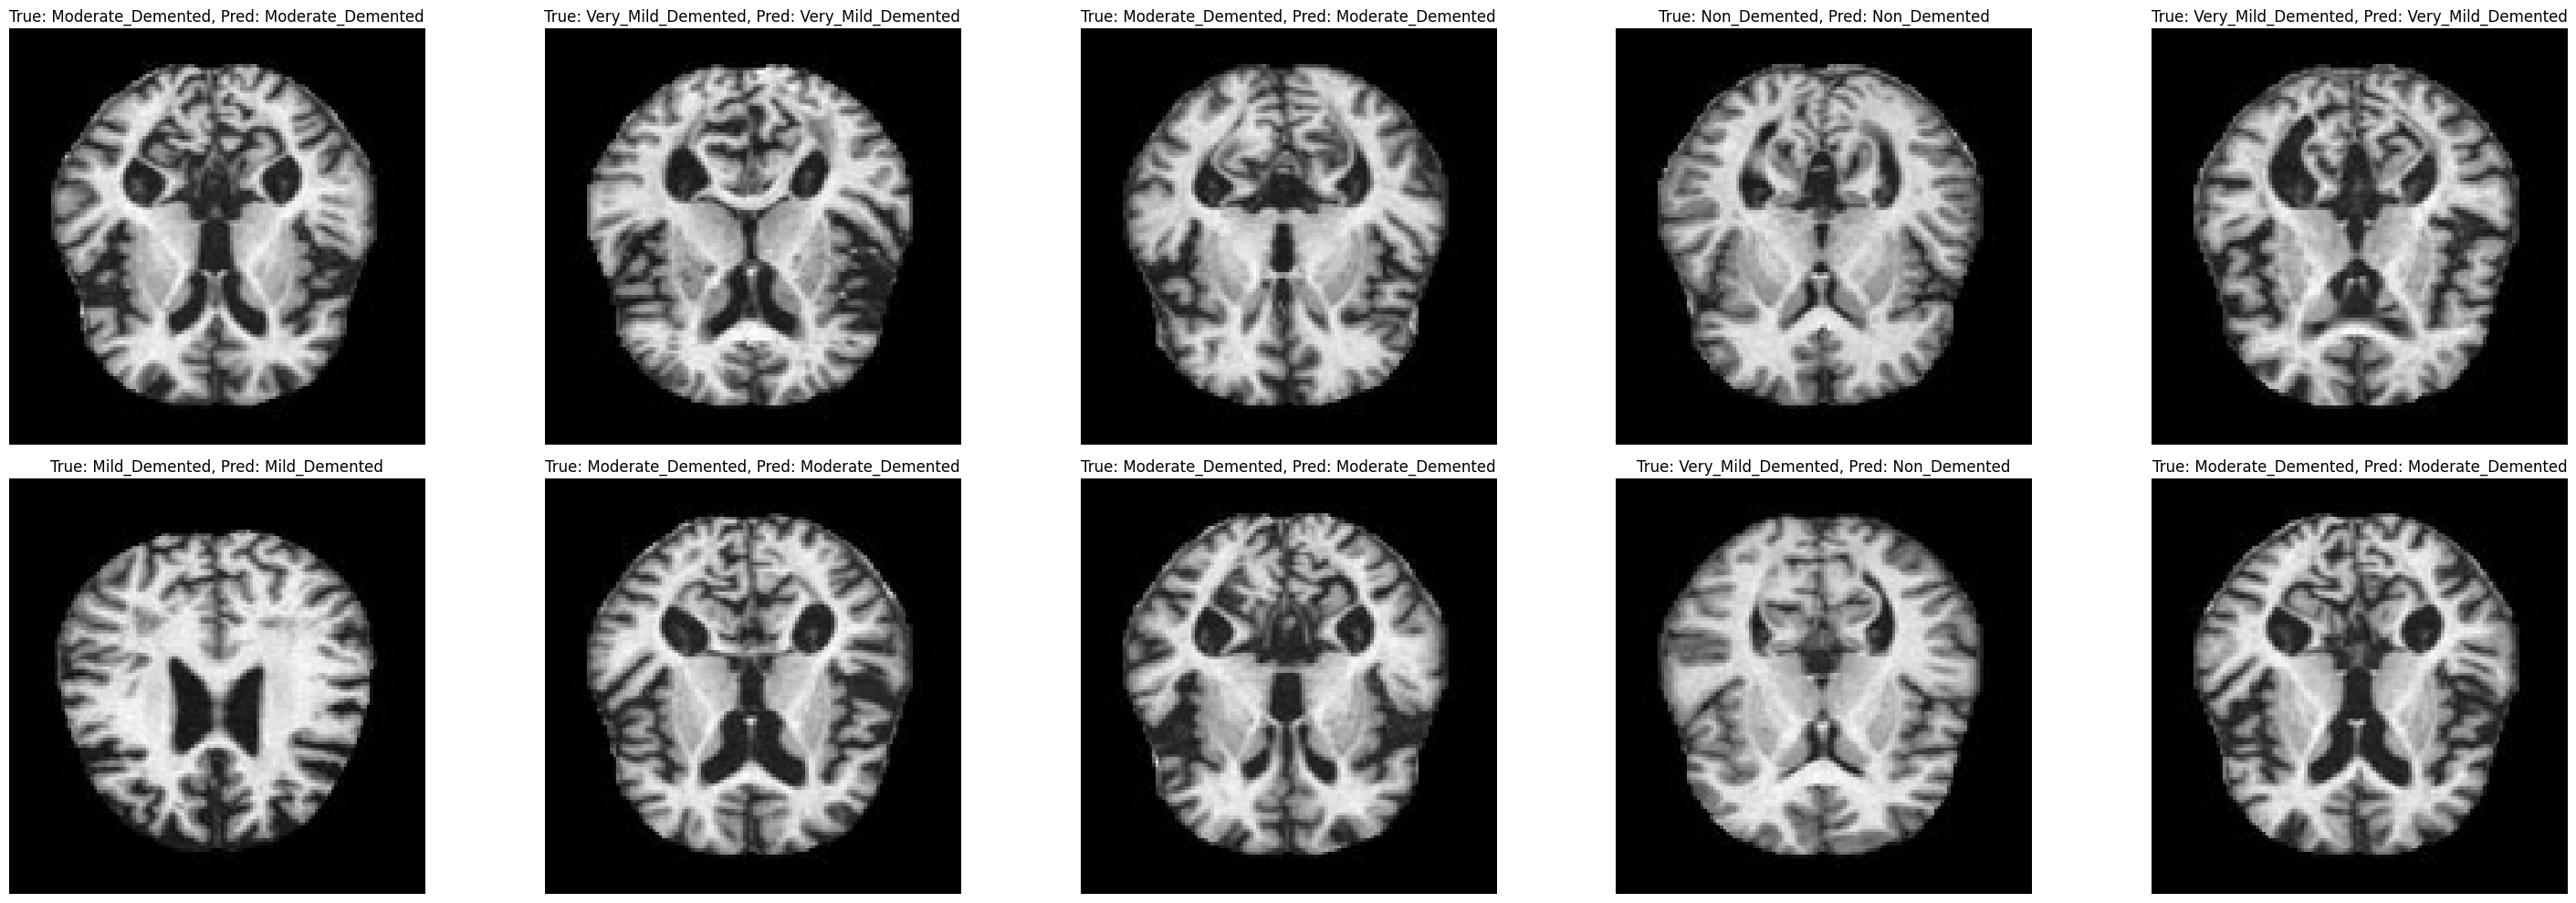

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your test_generator already defined and a model
# Get the class indices from the generator
class_indices = test_generator.class_indices
# Reverse the class indices dictionary to get a mapping from index to class name
index_to_class = {v: k for k, v in class_indices.items()}

# Get one batch of data
images, true_labels = next(test_generator)

# Get model predictions for this batch
predictions = CNN31.predict(images)
predicted_indices = np.argmax(predictions, axis=1)  # Convert predictions to label indices

# Convert true and predicted indices to class names
true_class_names = [index_to_class[idx] for idx in np.argmax(true_labels, axis=1)]
predicted_class_names = [index_to_class[idx] for idx in predicted_indices]

# Plot the images with their true and predicted class names
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 10))

for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')  # Use cmap='gray' for grayscale images
        true_class_name = true_class_names[i]
        predicted_class_name = predicted_class_names[i]
        ax.set_title(f"True: {true_class_name}, Pred: {predicted_class_name}")
        ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()


In [ ]:
for layer in CNN31.layers:
    print(layer.name)


conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
flatten
dense
dropout
dense_1
dense_2


In [ ]:
CNN31.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 125, 125, 256)       │          12,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 59, 59, 64)          │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 256)         │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,012,806 (3.86 MB)

 Trainable params: 1,012,804 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=81d0218ce048c526388003f68d44e312f45bda7ded5e3cc2ad13d7f6c54459f2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# LIME

test_image.shape: 	 (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Prediction Probabilities: 	 [[5.4635215e-03 2.1754542e-05 1.2365387e-02 9.8214936e-01]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

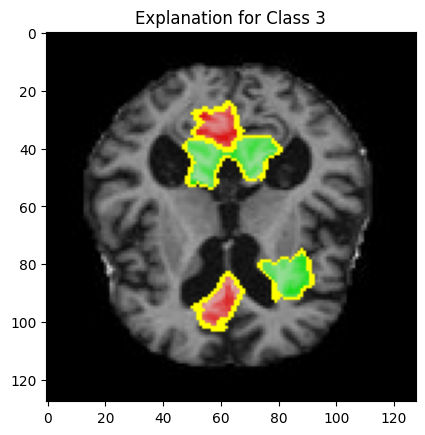

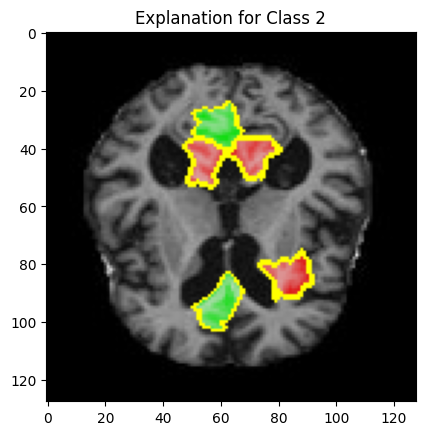

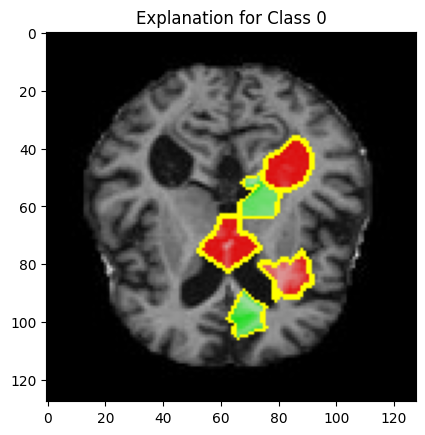

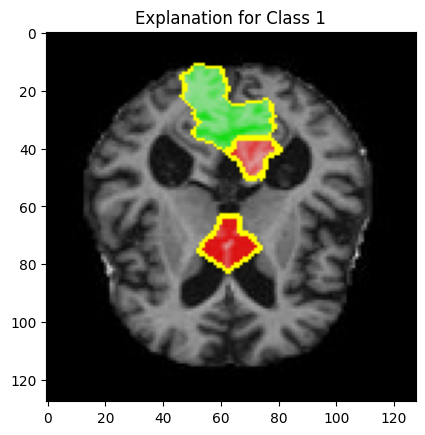

In [ ]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import slic, mark_boundaries

# Define a different segmentation function (e.g., SLIC)
def segmentation_fn(image):
    # Apply SLIC segmentation
    segments = slic(image, n_segments=100, compactness=50, start_label=1)
    return segments

# Define the prediction function for LIME
def predict_fn(images):
    # Ensure images are in the correct format
    images = np.array(images)
    # Make predictions
    predictions = CNN31.predict(images)
    return predictions

# Fetch a batch of images from the test generator
test_batch = next(test_generator)
test_image = test_batch[0][0:1]  # Use the first image from the batch

# Print image shape and model predictions
print("test_image.shape: \t", test_image.shape)
print("\nPrediction Probabilities: \t", CNN31.predict(test_image))

# Initialize the LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Explain the instance
explanation = explainer.explain_instance(
    test_image[0].astype('float32'),
    predict_fn,
    top_labels=5,
    segmentation_fn=segmentation_fn  # Use the custom segmentation function
)

print("Total Explanations Generated: \t", len(explanation.top_labels))
print("Getting explanations for different classes: \n\n")

# Loop over the top labels and generate explanations
for label in explanation.top_labels:
    fig, ax = plt.subplots()

    # Get the image and mask for the current label
    img, mask = explanation.get_image_and_mask(
        label=label,
        positive_only=False,
        hide_rest=False
    )

    # Plot the results
    ax.imshow(mark_boundaries(img, mask))
    plt.title(f'Explanation for Class {label}')

    # Save the figure
    pdf_filename = f'{label}.pdf'
    plt.savefig(pdf_filename, format='pdf')

    # Show the plot
    plt.show()


Red: Indicates regions that positively contribute to the prediction of a specific class. In other words, these areas are associated with higher probabilities for the predicted class.
Green: Indicates regions that negatively contribute to the prediction of a specific class. These areas are associated with lower probabilities or are less supportive of the predicted class.

# SALIENCY MAPS


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


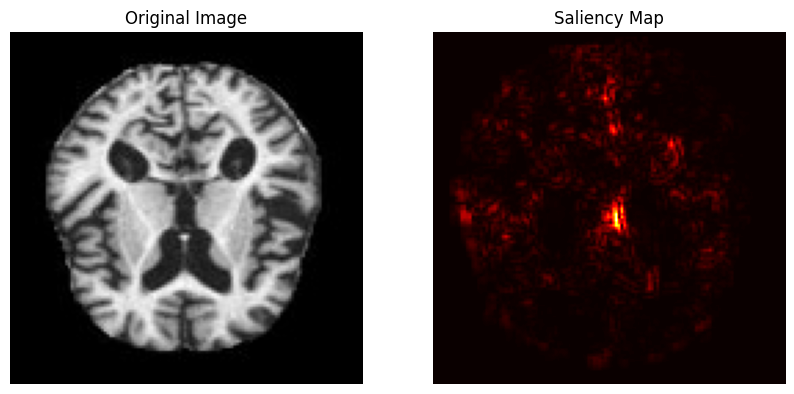

In [ ]:
# Fetch a batch of images from the test generator
test_images, _ = next(test_generator)

# Define the Saliency Map function
def saliency_map(image, model, class_index):
    # Ensure the image is a tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image, training=False)
        loss = predictions[:, class_index]

    # Compute gradients
    grads = tape.gradient(loss, image)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)

    return saliency.numpy()

# Fetch a single image from the test data for explanation
test_image = test_images[0:1]  # Use the first image

# Predict the class for the test image
predictions = CNN31.predict(test_image)
predicted_class = np.argmax(predictions)

# Compute Saliency Map
saliency_map_img = saliency_map(test_image, CNN31, predicted_class)

# Visualize Saliency Map
def plot_saliency(image, saliency_map):
    # Normalize the saliency map
    saliency_map = np.squeeze(saliency_map)
    saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())
    saliency_map = np.uint8(255 * saliency_map)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Saliency Map')
    plt.imshow(saliency_map, cmap='hot')
    plt.axis('off')

    plt.show()

plot_saliency(test_image, saliency_map_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


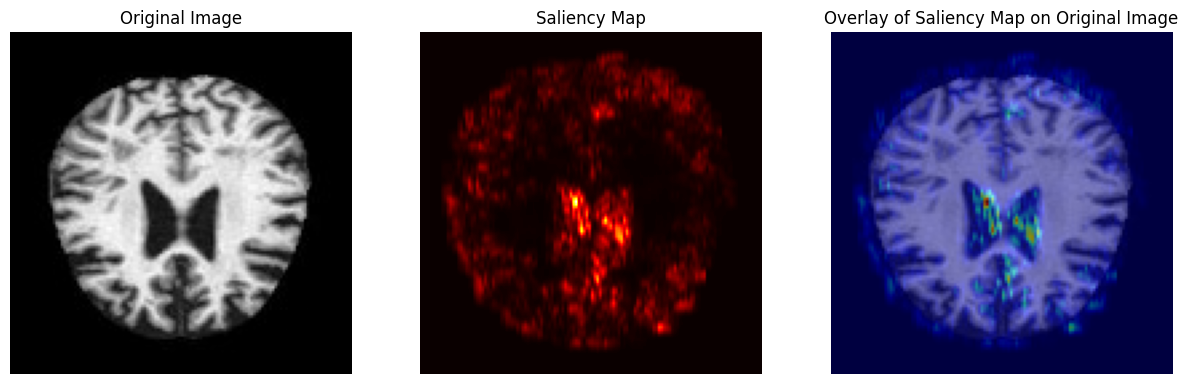

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fetch a batch of images from the test generator
test_images, _ = next(test_generator)

# Define the Saliency Map function
def saliency_map(image, model, class_index):
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image, training=False)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, image)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)

    return saliency.numpy()

# Fetch a single image from the test data for explanation
test_image = test_images[0:1]  # Use the first image

# Predict the class for the test image
predictions = CNN31.predict(test_image)
predicted_class = np.argmax(predictions)

# Compute Saliency Map
saliency_map_img = saliency_map(test_image, CNN31, predicted_class)

# Enhance Saliency Map by applying Gaussian Blur
saliency_map_img = cv2.GaussianBlur(saliency_map_img, (5, 5), 0)

# Normalize the saliency map
saliency_map_img = np.squeeze(saliency_map_img)
saliency_map_img = (saliency_map_img - saliency_map_img.min()) / (saliency_map_img.max() - saliency_map_img.min())

# Convert to uint8 for visualization
saliency_map_img = np.uint8(255 * saliency_map_img)

# Overlay Saliency Map on Original Image
overlay = cv2.applyColorMap(saliency_map_img, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(overlay, 0.5, cv2.cvtColor(np.uint8(255 * test_image[0]), cv2.COLOR_RGB2BGR), 0.5, 0)

# Visualize the Original Image, Saliency Map, and Overlay
def plot_saliency(image, saliency_map, overlay):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image[0])
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Saliency Map')
    plt.imshow(saliency_map, cmap='hot')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Overlay of Saliency Map on Original Image')
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

plot_saliency(test_image, saliency_map_img, overlay)


# SMOOTHGRAD

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


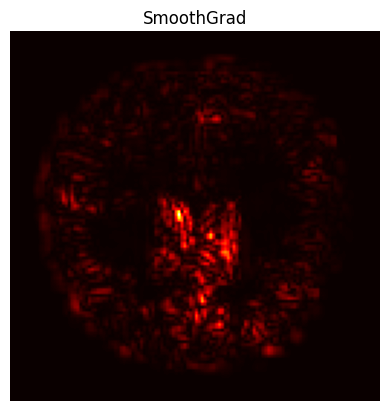

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to compute gradients of the input with respect to the predicted class
def compute_gradients(inputs, model, class_index):
    with tf.GradientTape() as tape:
        inputs = tf.cast(inputs, tf.float32)
        tape.watch(inputs)
        predictions = model(inputs)
        loss = predictions[:, class_index]
    return tape.gradient(loss, inputs)

# SmoothGrad function to add noise to the input image and average the gradients
def smoothgrad(inputs, model, class_index, num_samples=50, noise=0.1):
    inputs = np.array(inputs, dtype=np.float32)
    smoothgrad = np.zeros_like(inputs)

    for _ in range(num_samples):
        noise_added = inputs + np.random.normal(0, noise, inputs.shape)
        grad = compute_gradients(noise_added, model, class_index)
        smoothgrad += grad.numpy()

    smoothgrad /= num_samples
    return smoothgrad

# Choose an image from the test set for explanation
test_image = test_images[0:1]  # Assuming test_images is already defined and preprocessed

# Predict the class for the test image
predicted_class = np.argmax(CNN31.predict(test_image))  # Make sure 'CNN31' is your trained model

# Compute SmoothGrad explanations
smoothgrad_result = smoothgrad(test_image, CNN31, predicted_class)

# Normalize the SmoothGrad output for better visualization
smoothgrad_norm = np.abs(smoothgrad_result[0]).sum(axis=-1)
smoothgrad_norm = (smoothgrad_norm - smoothgrad_norm.min()) / (smoothgrad_norm.max() - smoothgrad_norm.min())

# Plot the SmoothGrad result
plt.imshow(smoothgrad_norm, cmap='hot')
plt.title("SmoothGrad")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


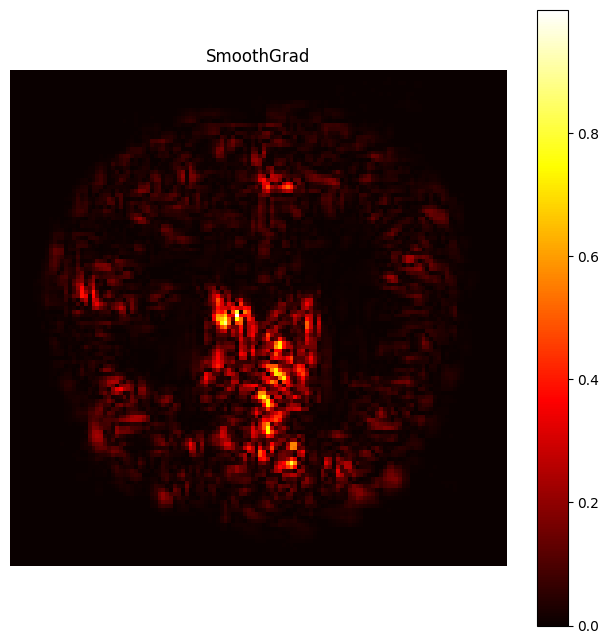

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to compute gradients of the input with respect to the predicted class
def compute_gradients(inputs, model, class_index):
    with tf.GradientTape() as tape:
        inputs = tf.cast(inputs, tf.float32)
        tape.watch(inputs)
        predictions = model(inputs)
        loss = predictions[:, class_index]
    return tape.gradient(loss, inputs)

# SmoothGrad function to add noise to the input image and average the gradients
def smoothgrad(inputs, model, class_index, num_samples=50, noise=0.1):
    inputs = np.array(inputs, dtype=np.float32)
    smoothgrad = np.zeros_like(inputs)

    for _ in range(num_samples):
        noise_added = inputs + np.random.normal(0, noise, inputs.shape)
        grad = compute_gradients(noise_added, model, class_index)
        smoothgrad += grad.numpy()

    smoothgrad /= num_samples
    return smoothgrad

# Function to visualize the SmoothGrad result with enhancements
def visualize_smoothgrad(smoothgrad_result, cmap='inferno'):
    # Normalize the SmoothGrad output for better visualization
    smoothgrad_norm = np.abs(smoothgrad_result[0]).sum(axis=-1)
    smoothgrad_norm = (smoothgrad_norm - smoothgrad_norm.min()) / (smoothgrad_norm.max() - smoothgrad_norm.min() + 1e-5)

    # Plot the SmoothGrad result
    plt.figure(figsize=(8, 8))
    plt.imshow(smoothgrad_norm, cmap=cmap)
    plt.title("SmoothGrad")
    plt.colorbar()  # Add a colorbar for better interpretation
    plt.axis('off')
    plt.show()

# Choose an image from the test set for explanation
test_image = test_images[0:1]  # Assuming test_images is already defined and preprocessed

# Predict the class for the test image
predicted_class = np.argmax(CNN31.predict(test_image))  # Make sure 'CNN31' is your trained model

# Compute SmoothGrad explanations
smoothgrad_result = smoothgrad(test_image, CNN31, predicted_class, num_samples=100, noise=0.2)

# Visualize SmoothGrad with the enhanced visualization function
visualize_smoothgrad(smoothgrad_result, cmap='hot')


# Occlusion Sensitivity

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

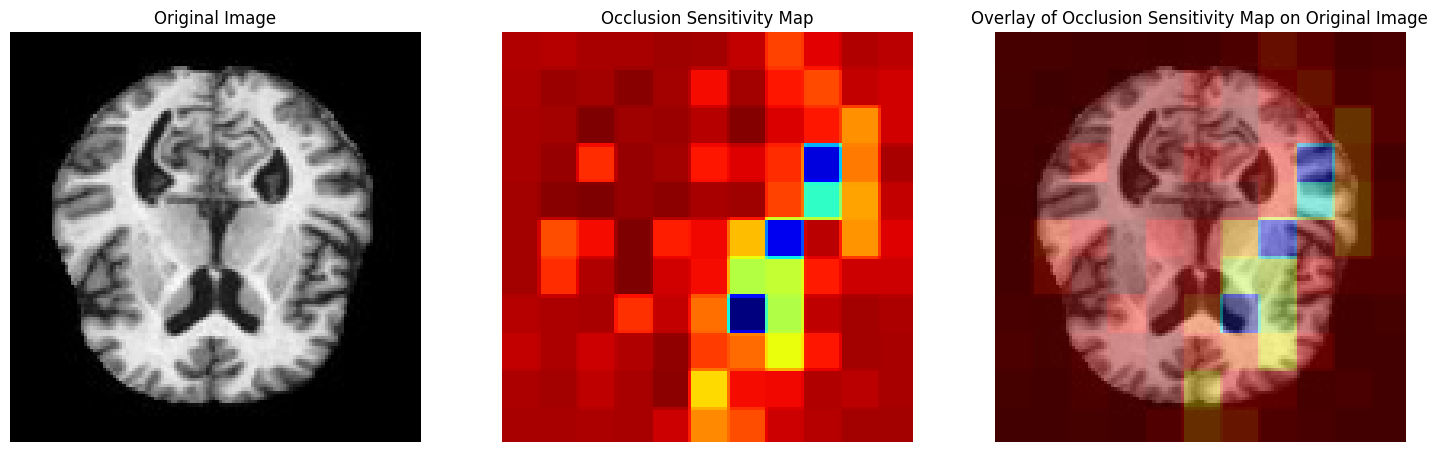

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Fetch a batch of images from the test generator
test_images, _ = next(test_generator)

# Define the Occlusion Sensitivity function
def occlusion_sensitivity(image, model, class_index, patch_size=10, stride=5):
    occlusion_map = np.zeros((image.shape[1] - patch_size + 1, image.shape[2] - patch_size + 1))

    img_height, img_width = image.shape[1], image.shape[2]

    for y in range(0, img_height - patch_size + 1, stride):
        for x in range(0, img_width - patch_size + 1, stride):
            occluded_image = np.copy(image)
            occluded_image[0, y:y+patch_size, x:x+patch_size, :] = np.mean(image)

            predictions = model.predict(occluded_image)
            occlusion_map[y:y+patch_size, x:x+patch_size] = predictions[0, class_index]

    # Normalize the occlusion map
    occlusion_map = (occlusion_map - occlusion_map.min()) / (occlusion_map.max() - occlusion_map.min())

    # Resize the occlusion map to match the original image size
    occlusion_map_resized = cv2.resize(occlusion_map, (img_width, img_height))

    return occlusion_map_resized

# Fetch a single image from the test data for explanation
test_image = test_images[0:1]

# Predict the class for the test image
predictions = CNN31.predict(test_image)
predicted_class = np.argmax(predictions)

# Compute Occlusion Sensitivity Map
occlusion_map = occlusion_sensitivity(test_image, CNN31, predicted_class, patch_size=20, stride=10)

# Overlay Occlusion Map on Original Image
def overlay_occlusion_map(image, occlusion_map):
    heatmap = cv2.applyColorMap(np.uint8(255 * occlusion_map), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(cv2.cvtColor(np.uint8(255 * image[0]), cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)
    return overlay

overlay = overlay_occlusion_map(test_image, occlusion_map)

# Visualize Original Image, Occlusion Sensitivity Map, and Overlay
def plot_occlusion(image, occlusion_map, overlay):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image[0])
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Occlusion Sensitivity Map')
    plt.imshow(occlusion_map, cmap='jet')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Overlay of Occlusion Sensitivity Map on Original Image')
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

plot_occlusion(test_image, occlusion_map, overlay)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

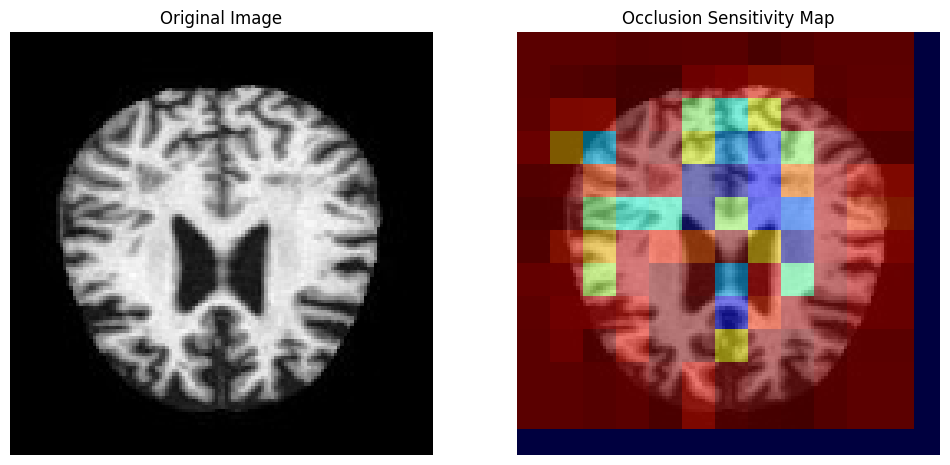

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the improved Occlusion Sensitivity function
def occlusion_sensitivity(image, model, class_index, patch_size=10, stride=5):
    # Initialize the occlusion map
    occlusion_map = np.zeros((image.shape[1], image.shape[2]))

    # Dimensions of the image
    img_height, img_width = image.shape[1], image.shape[2]

    # Loop over the image with the specified stride
    for y in range(0, img_height - patch_size + 1, stride):
        for x in range(0, img_width - patch_size + 1, stride):
            # Create a copy of the image
            occluded_image = np.copy(image)

            # Set the patch to a neutral value (e.g., mean of the training data or zero)
            occluded_image[0, y:y+patch_size, x:x+patch_size, :] = 0  # Here setting to zero

            # Predict with the occluded image
            predictions = model.predict(occluded_image)
            occlusion_map[y:y+patch_size, x:x+patch_size] = predictions[0, class_index]

    # Normalize the occlusion map
    occlusion_map -= np.min(occlusion_map)
    occlusion_map /= np.max(occlusion_map)

    return occlusion_map

# Fetch a single image from the test data for explanation
test_image = test_images[0:1]  # Use the first image

# Predict the class for the test image
predictions = CNN31.predict(test_image)
predicted_class = np.argmax(predictions)

# Compute Occlusion Sensitivity Map
occlusion_map = occlusion_sensitivity(test_image, CNN31, predicted_class, patch_size=20, stride=10)

# Improved visualization: Overlay Occlusion Map on Original Image
def plot_occlusion(image, occlusion_map):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Occlusion Sensitivity Map')
    plt.imshow(image[0])
    plt.imshow(occlusion_map, cmap='jet', alpha=0.5)  # Overlay with transparency
    plt.axis('off')

    plt.show()

plot_occlusion(test_image, occlusion_map)
